In [2]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC


from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv("creditcard.csv")
pd.options.display.max_columns = None
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [8]:
data=data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [9]:
data.duplicated().any()

True

In [10]:
data= data.drop_duplicates()
data.shape

(275663, 30)

In [13]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,-0.007174,-0.005347,0.000539,0.000681,-0.010315,-0.004319,0.000479,0.003874,0.000511,0.003407,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,1.020571,0.998661,0.999660,0.952571,0.917772,0.880320,0.844821,0.841638,0.820520,0.779950,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,-0.772693,-0.413717,-0.654360,-0.425932,-0.596079,-0.477642,-0.482600,-0.498396,-0.464409,-0.212027,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,-0.039469,0.133349,-0.011557,0.049552,0.036145,0.061670,-0.063489,0.001392,0.001119,-0.058053,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,0.734969,0.614670,0.668570,0.492169,0.638997,0.524709,0.401407,0.507708,0.465782,0.139803,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


In [12]:
x = data.drop(["Class"], axis= 1)
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [13]:
y = data["Class"]
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64

In [15]:
fraud = data[data['Class']==1] #classifing fraud and normal 
fraud.shape

(473, 30)

In [16]:
normal = data[data['Class']==0]
normal.shape

(275190, 30)

In [17]:
#Balance the dataset 
oversample = SMOTE()
x_1, y_1 = oversample.fit_resample(x,y)
x_1.shape


(550380, 29)

In [18]:
y_1.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

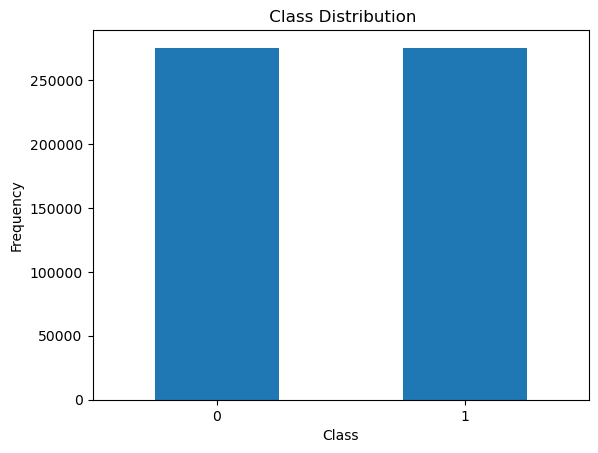

In [19]:
class_distribusion = pd.value_counts(y_1, sort = True)
class_distribusion.plot(kind = 'bar', rot=0)
plt.title(" Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

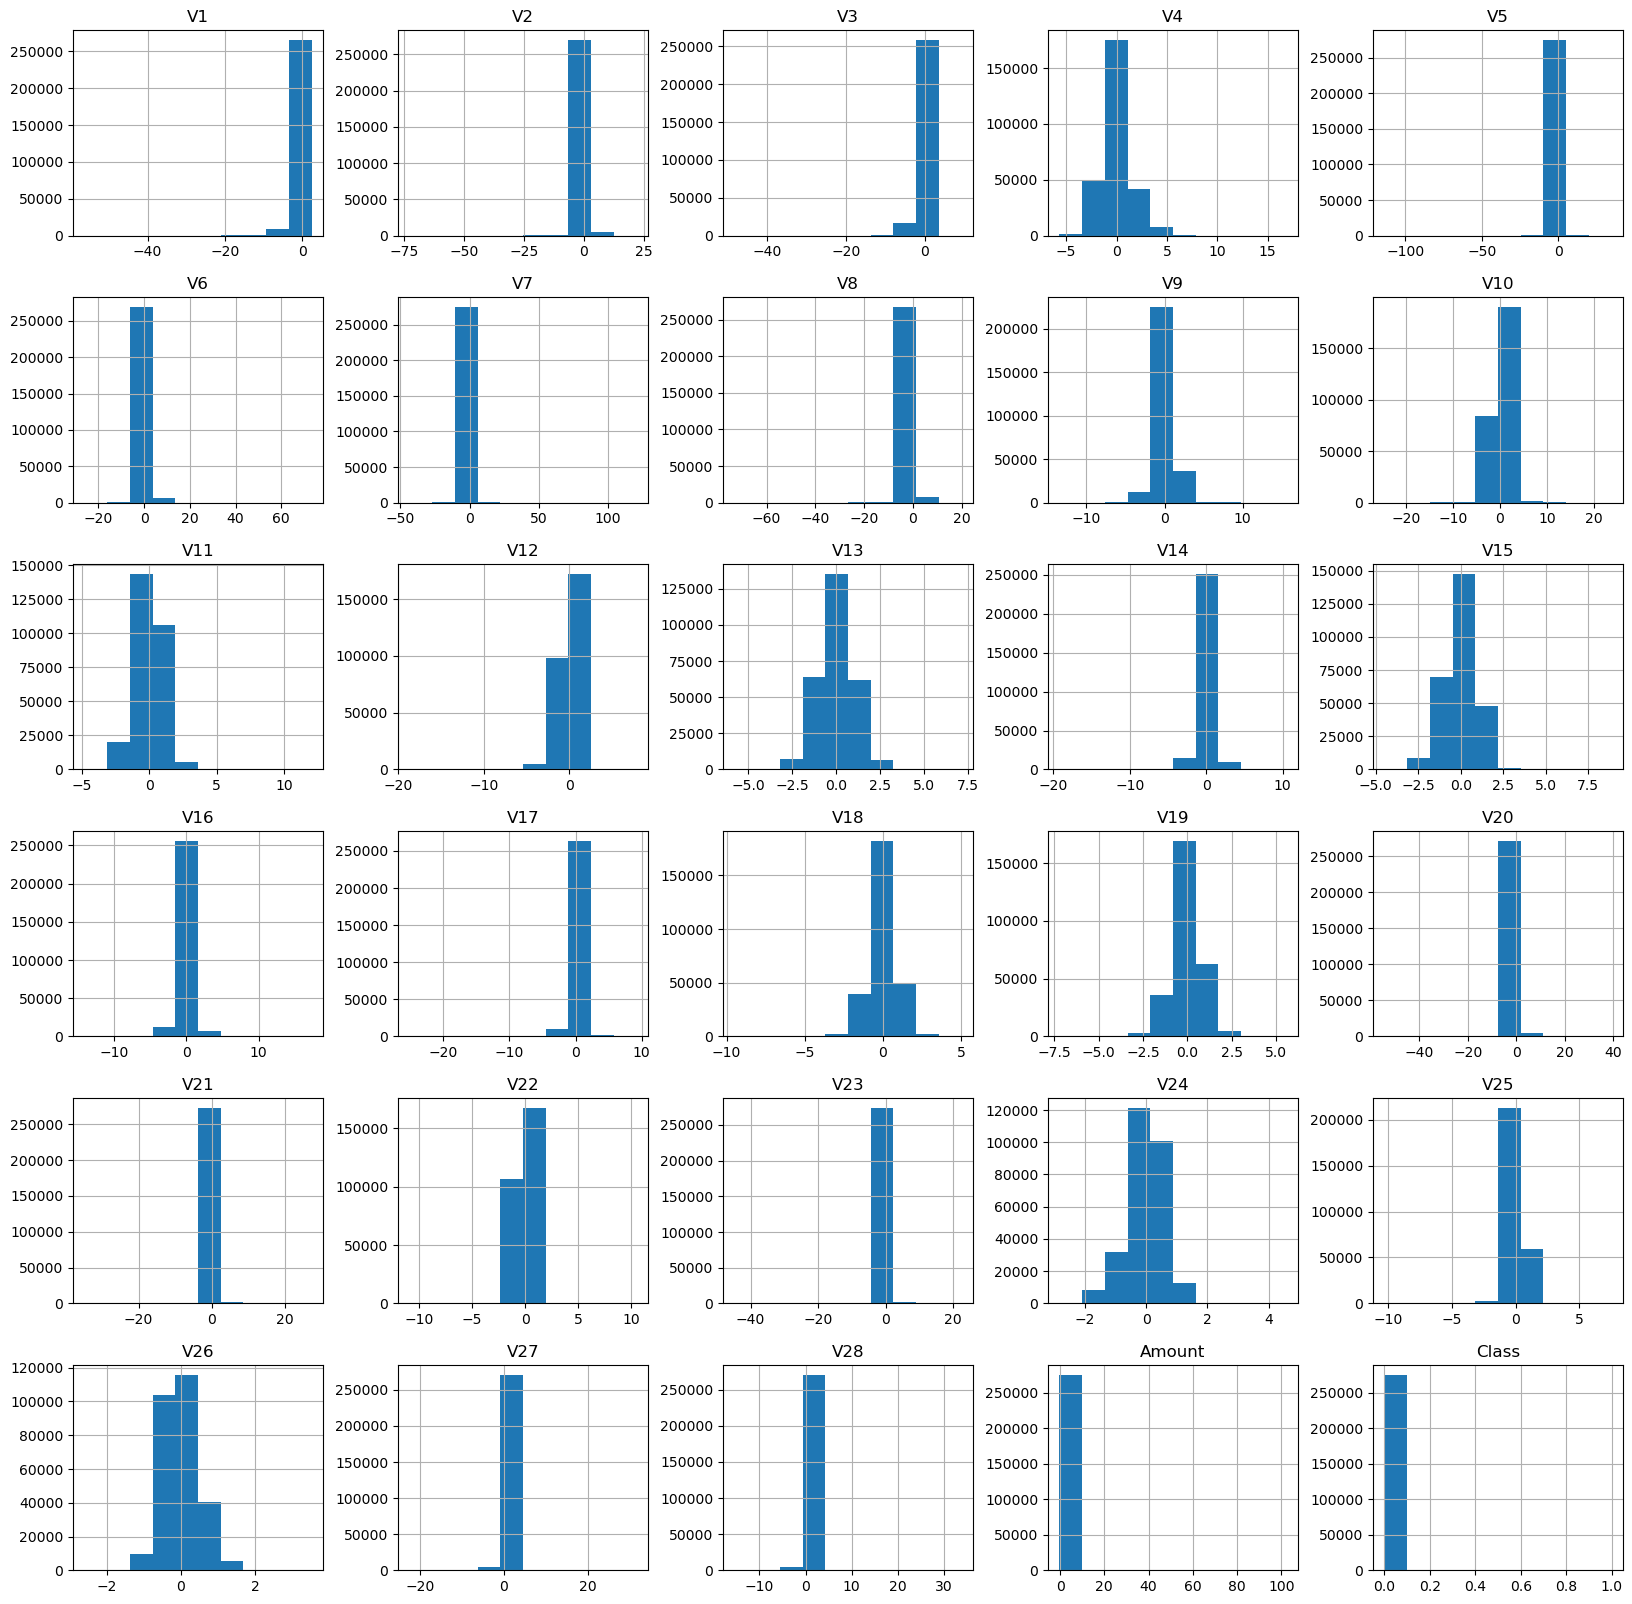

In [16]:
data.hist(figsize=(20,20))
plt.show() 

In [19]:
x.shape

(275663, 29)

In [20]:
y.shape

(275663,)

In [20]:
(x_train, x_test, y_train, y_test) = train_test_split(x_1, y_1, test_size= 0.2, random_state= 35)
x_train.shape

(440304, 29)

In [ ]:
x_test.shape

Decision Tree
 
Decision Tree Score for training: 1.00
Decision Tree Score for testing: 1.00
 
Classification Report for training: 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    220023
           1       1.00      1.00      1.00    220281

    accuracy                           1.00    440304
   macro avg       1.00      1.00      1.00    440304
weighted avg       1.00      1.00      1.00    440304

Classification Report for tesing: 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55167
           1       1.00      1.00      1.00     54909

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076

Confusion Matrix for Decision Tree
 
[[55048   119]
 [   81 54828]]
 


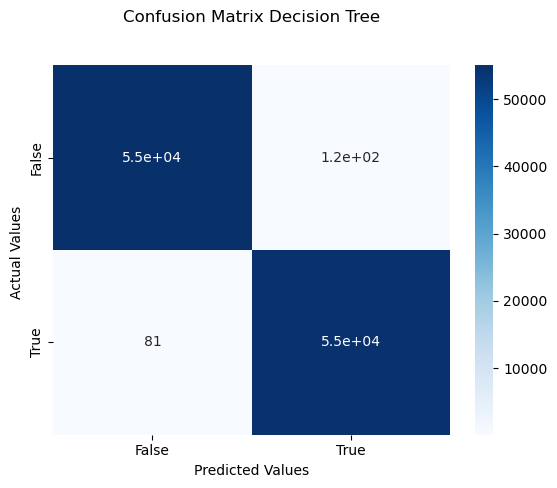

In [21]:
#Decision Tree
print("\033[31mDecision Tree\033[0m")
print(" ")
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
decision_tree_predictions = decision_tree_model.predict(x_test)
decision_tree_score_train = decision_tree_model.score(x_train, y_train)
decision_tree_score_test = decision_tree_model.score(x_test, y_test)
print(f"\033[1;30mDecision Tree Score for training\033[0m: {decision_tree_score_train:.2f}")
print(f"\033[1;30mDecision Tree Score for testing\033[0m: {decision_tree_score_test:.2f}")
print(" ")
# Evaluate the model on the validation set
y_predict_decision_tree_train = decision_tree_model.predict(x_train)
#Decision tree classification_report 
print("\033[1;30mClassification Report for training\033[0m: ")
print(" ")
print(classification_report(y_train, y_predict_decision_tree_train))
y_predict_decision_tree_test = decision_tree_model.predict(x_test)
print("\033[1;30mClassification Report for tesing\033[0m: ")
print(" ")
print(classification_report(y_test, y_predict_decision_tree_test))
confusion_matrix_decision_tree = confusion_matrix(y_test, decision_tree_predictions.round())
print("\033[1;30mConfusion Matrix for Decision Tree\033[0m")
print(" ")
print(confusion_matrix_decision_tree)
print(" ")
ax = sns.heatmap(confusion_matrix_decision_tree, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix Decision Tree\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Random Forest
print("\033[31mRandom Forest\033[0m")
print(" ")
random_forest_model = RandomForestClassifier(n_estimators= 50)
random_forest_model.fit(x_train, y_train)
random_forest_predictions = random_forest_model.predict(x_test)
random_forest_score_train = random_forest_model.score(x_train, y_train) 
random_forest_score_test = random_forest_model.score(x_test, y_test) 
print(f"\033[1;30mRandom Forest Score for training\033[0m: {random_forest_score_train:.2f}")
print(f"\033[1;30mRandom Forest Score for testing\033[0m: {random_forest_score_test:.2f}")
print(" ")
#Random forest classification report
y_predict_random_forest_train = random_forest_model.predict(x_train)
print("\033[1;30mClassification Report for training\033[0m: ")
print(" ")
print(classification_report(y_train, y_predict_random_forest_train ))
y_predict_random_forest_test = random_forest_model.predict(x_test)
print("\033[1;30mClassification Report for testing\033[0m: ")
print(" ")
print(classification_report(y_test, y_predict_random_forest_test))
confusion_matrix_random_forest = confusion_matrix(y_test, random_forest_predictions.round())
print("\033[1;30mConfusion Matrix for Random Forest\033[0m")
print(" ")
print(confusion_matrix_random_forest)
print(" ")
ax = sns.heatmap(confusion_matrix_random_forest, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix Random Forest\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#Display the visualization of the Confusion Matrix.
plt.show()

Naive Bayes(GaussianNB)
 
Accuracy for training : 0.91
Accuracy for testing : 0.91
 
Classification Report for training: 
 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    220023
           1       0.97      0.85      0.91    220281

    accuracy                           0.91    440304
   macro avg       0.92      0.91      0.91    440304
weighted avg       0.92      0.91      0.91    440304

Classification Report for testing: 
 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     55167
           1       0.97      0.85      0.91     54909

    accuracy                           0.91    110076
   macro avg       0.92      0.91      0.91    110076
weighted avg       0.92      0.91      0.91    110076

Confusion Matrix GaussianNB
 
[[53812  1355]
 [ 8295 46614]]


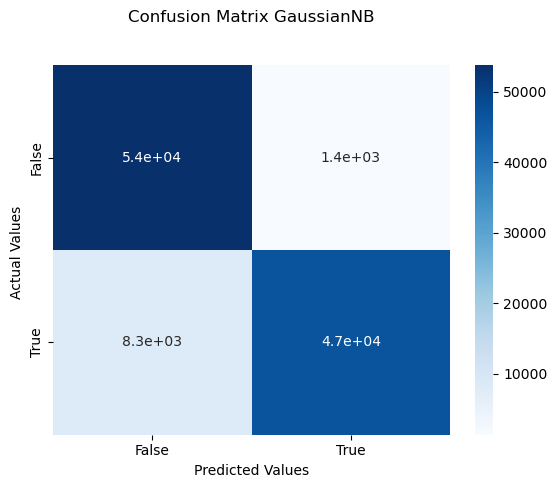

In [25]:
#Naive Bayes
print("\033[31mNaive Bayes(GaussianNB)\033[0m")
print(" ")
GC = GaussianNB()#Create a Gaussian Classifier
gaussian_model = GC.fit(x_train, y_train)#Train the model using the training sets
y_predict_gaussian_train = GC.predict(x_train)#Predict the response for test dataset
y_predict_gaussian_test = GC.predict(x_test)
print(f"\033[1;30mAccuracy for training\033[0m : {metrics.accuracy_score(y_train, y_predict_gaussian_train):.2f}")
print(f"\033[1;30mAccuracy for testing\033[0m : {metrics.accuracy_score(y_test, y_predict_gaussian_test):.2f}")
print(" ")
print("\033[1;30mClassification Report for training\033[0m: ")
print(" ")
print(classification_report(y_train, y_predict_gaussian_train))
print("\033[1;30mClassification Report for testing\033[0m: ")
print(" ")
print(classification_report(y_test, y_predict_gaussian_test))
confusion_matrix_gaussian = confusion_matrix(y_test, y_predict_gaussian_test.round())
print("\033[1;30mConfusion Matrix GaussianNB\033[0m")
print(" ")
print(confusion_matrix_gaussian)
ax = sns.heatmap(confusion_matrix_gaussian, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix GaussianNB\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
#Classification using KNN (k Nearest Neighbors)
print("\033[31mKNN k Nearest Neighbors\033[0m")
print(" ")
knn_model = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn_model.fit(x_train, y_train)
knn_predict_test = knn_model.predict(x_test)
knn_predict_train = knn_model.predict(x_train)
score_train = knn_model.score(x_train, y_train)
score_test = knn_model.score(x_test, y_test)
print(f"\033[1;30mAccuracy for training\033[0m : {score_train:.2f}")
score = knn_model.score(x_test, y_test)
print(f"\033[1;30mAccuracy for testing\033[0m : {score_test:.2f}")
print(" ")
print("\033[1;30mClassification Report for training\033[0m: ")
print(" ")
print(classification_report(y_train, knn_predict_train))
print("\033[1;30mClassification Report for testing\033[0m: ")
print(" ")
print(classification_report(y_test, knn_predict_test))
confusion_matrix_knn = metrics.confusion_matrix(y_test, knn_predict_test)
print("\033[1;30mconfusion_matrix_knn\033[0m")
print(" ")
print(confusion_matrix_knn)
# Model Accuracy, how often is the classifier correct?
ax = sns.heatmap(confusion_matrix_knn, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix KNN\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#Display the visualization of the Confusion Matrix.
plt.show()

Logistic Regression
 
Accuracy for training: 0.94
Accuracy for testing: 0.95
 
Classification Report for training: 
 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    220023
           1       0.97      0.91      0.94    220281

    accuracy                           0.94    440304
   macro avg       0.95      0.94      0.94    440304
weighted avg       0.95      0.94      0.94    440304

Classification Report for testing: 
 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     55167
           1       0.97      0.91      0.94     54909

    accuracy                           0.95    110076
   macro avg       0.95      0.95      0.95    110076
weighted avg       0.95      0.95      0.95    110076

Confusion Matrix for Logistic Regression
 
[[53823  1344]
 [ 4679 50230]]
 


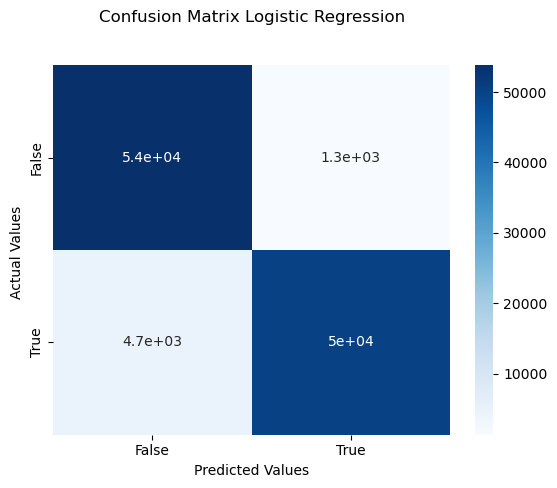

In [26]:
print("\033[31mLogistic Regression\033[0m")
print(" ")
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_predict_logistic_test = logistic_model.predict(x_test)
y_predict_logistic_train = logistic_model.predict(x_train)
score_train = (accuracy_score(y_train, y_predict_logistic_train))
score_test = (accuracy_score(y_test, y_predict_logistic_test))
print(f"\033[1;30mAccuracy for training\033[0m: {score_train:.2f}")
print(f"\033[1;30mAccuracy for testing\033[0m: {score_test:.2f}")
print(" ")
print("\033[1;30mClassification Report for training\033[0m: ")
print(" ")
print(classification_report(y_train, y_predict_logistic_train))
print("\033[1;30mClassification Report for testing\033[0m: ")
print(" ")
print(classification_report(y_test, y_predict_logistic_test))
confusion_matrix_logistic = confusion_matrix(y_test, y_predict_logistic_test.round())
print("\033[1;30mConfusion Matrix for Logistic Regression\033[0m")
print(" ")
print(confusion_matrix_logistic)
print(" ")
ax = sns.heatmap(confusion_matrix_logistic, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix Logistic Regression\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Building a Support Vector Machine on train data
print("\033[31mSupport Vector Machine\033[0m")
print(" ")
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(x_train, y_train)
prediction_svc_test = svc_model .predict(x_test)
prediction_svc_train = svc_model .predict(x_train)
# check the accuracy on the training set
train_score = svc_model.score(x_train, y_train)
# check the accuracy on the testing set
test_score = svc_model.score(x_test, y_test)
print("\033[1;30mAccuracy\033[0m")
print(f"\033[1;30mTraining Score is\033[0m : {train_score:.2f}")
print(f"\033[1;30mTesting Score is\033[0m :  {test_score:.2f}")
print(" ")
#Classification Report
print("\033[1;30mClassification Report for training\033[0m ")
print(" ")
print(classification_report(y_train, prediction_svc_train ))
print("\033[1;30mClassification Report for testing\033[0m ")
print(" ")
print(classification_report(y_test, prediction_svc_test))
print(" ")
print("\033[1;30mConfusion Matrix SVC\033[0m")
print(" ")
confusion_matrix_svc = confusion_matrix(prediction_svc_test, y_test)
print(confusion_matrix(prediction_svc_test, y_test))
ax = sns.heatmap(confusion_matrix_svc, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix SVM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
#Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Save the model
decision_tree_model_save = DecisionTreeClassifier()
decision_tree_model_save.fit(x_1, y_1)

In [ ]:
import joblib
joblib.dump(decision_tree_model_save, "Credit_Card_model")

In [ ]:
model = joblib.load("Credit_Card_model")
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
pred

In [ ]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transaction")

In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())
    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())
    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())    
    v17=float(e17.get())
    v18=float(e18.get())
    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())
    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())
    
    model = joblib.load("Credit_Card_model")
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1= [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]
    result= []
    if y_pred == 0:
        result.append("Normal Transcation")
    else:
        result.append("Fraudulent Transaction")
    print("----------------------------")
    print("Credit Card Fraud Detection ", result)
    print("-----------------------------")
    Label(master, text= "Final Prediction from the model")
    Label(master, text= result).grid(row=32)
    
master = Tk()
master.title("Credit Card Fraud Detection")
label= Label(master, text= "Credit Card Fraud Detection"
            , bg = "black", fg = "white",width = 30).grid(row=30)

Label(master, text="Enter value of v1").grid(row=1)
Label(master, text="Enter value of v2").grid(row=2)
Label(master, text="Enter value of v3").grid(row=3)
Label(master, text="Enter value of v4").grid(row=4)
Label(master, text="Enter value of v5").grid(row=5)
Label(master, text="Enter value of v6").grid(row=6)
Label(master, text="Enter value of v7").grid(row=7)
Label(master, text="Enter value of v8").grid(row=8)
Label(master, text="Enter value of v9").grid(row=9)
Label(master, text="Enter value of v10").grid(row=10)
Label(master, text="Enter value of v11").grid(row=11)
Label(master, text="Enter value of v12").grid(row=12)
Label(master, text="Enter value of v13").grid(row=13)
Label(master, text="Enter value of v14").grid(row=14)
Label(master, text="Enter value of v15").grid(row=15)
Label(master, text="Enter value of v16").grid(row=16)
Label(master, text="Enter value of v17").grid(row=17)
Label(master, text="Enter value of v18").grid(row=18)
Label(master, text="Enter value of v19").grid(row=19)
Label(master, text="Enter value of v20").grid(row=20)
Label(master, text="Enter value of v21").grid(row=21)
Label(master, text="Enter value of v22").grid(row=22)
Label(master, text="Enter value of v23").grid(row=23)
Label(master, text="Enter value of v24").grid(row=24)
Label(master, text="Enter value of v25").grid(row=25)
Label(master, text="Enter value of v26").grid(row=26)
Label(master, text="Enter value of v27").grid(row=27)
Label(master, text="Enter value of v28").grid(row=28)
Label(master, text="Enter value of v29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23 = Entry(master)
e24 = Entry(master)
e25 = Entry(master)
e26 = Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)
e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)
e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)

Button(master, text="Predict", command=show_entry_fields).grid(row=30, column=1)
mainloop( )





----------------------------
Credit Card Fraud Detection  ['Normal Transcation']
-----------------------------
